En este ejemplo calculamos la transformada de Fourier de una imagen con 4 frecuencias y la filtramos en el espacio de Fourier para eliminar algunas de ellas. Luego calculamos la transformada inversa para volver al espacio de la imagen y ver el efecto del filtro.
Ver [imagen ilustrativa](https://drive.google.com/file/d/1UCkcUiLjm5L4AkLUDobJfqsvcXUyA2Eo/view?usp=sharing).

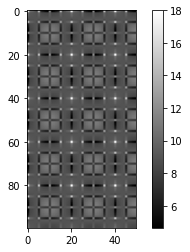

In [57]:
from matplotlib import pyplot as plt
import numpy as np

image = np.zeros((100,50))
sizeX=np.shape(image)[1] #Número de columnas
sizeY=np.shape(image)[0] #Número de filas

#Construiremos una imagen con 3 frecuencias distintintas y luego filtraremos algunas de ellas.

freq1X=0.05
freq1Y=0.05

freq2X=0.2
freq2Y=0.2

freq3X=0.4
freq3Y=0.4

for i in range (sizeX):
  for j in range (sizeY):
    image[j][i]=(np.cos(2*np.pi*freq1X*i)+np.cos(2*np.pi*freq2X*i)+np.cos(2*np.pi*freq3X*i))*(np.cos(2*np.pi*freq1Y*j)+np.cos(2*np.pi*freq2Y*j)+np.cos(2*np.pi*freq3Y*j))+9
    #Recordar que se ha añadido un offset (9) para que la imagen siempre tenga valores positivos.
plt.imshow(image, cmap='gray')
plt.colorbar()

Calculamos ahora la transformada de Fourier 2D.

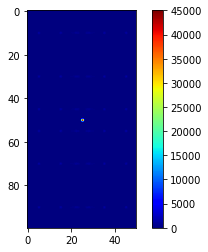

In [64]:
imageFFT=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(image))) #Para que la frecuencia cero quede en el centro
plt.imshow(abs(imageFFT), cmap='jet')
plt.colorbar()

Recordar que en este caso la frecuencia cero está en el centro, los extremos izquierdo y superior serían -Fsample/2=0.5 y los extremos derecho e inferior serían Fsample/2=0.5.
En el eje x de las frecuencias notamos máximos en x=25+2.5 que equivale a la frecuencia 2.5x0.5/25=0.05.
Tenemos los otros máximos en x=25+10=35 (frecuencia = 10x0.5/25=0.2) y en x=25+20=45 (frecuencia = 20x0.5/25=0.4)

Creamos ahora la máscara para modular la transformada de Fourier eliminando las frecuencias que sean bajas (0 y 0.05) tanto en X como en Y.

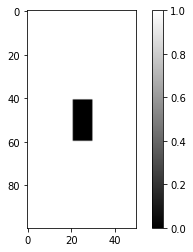

In [84]:
image_filter = np.zeros((100,50),dtype=complex)
for i in range (sizeX):
  for j in range (sizeY):
    if(20<i<30 and 40<j<60): #La frecuencia de corte se ha definido igual a 0.1 tanto en x como en y.
     image_filter[j][i]=0
    else:
     image_filter[j][i]=1
plt.imshow(abs(image_filter), cmap='gray')
plt.colorbar()

Multiplicamos ahora la transformada por el filtro.

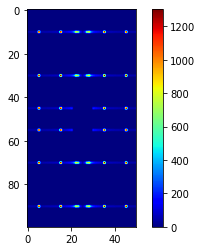

In [85]:
filteredFFT = np.zeros((100,50),dtype=complex)
for i in range (sizeX):
  for j in range (sizeY):
    filteredFFT[j][i]=imageFFT[j][i]*image_filter[j][i]
plt.imshow(abs(filteredFFT), cmap='jet')
plt.colorbar()

Finalmente calculamos la transformada inversa para tener la imagen filtrada. Se grafica junto con la imagen original.

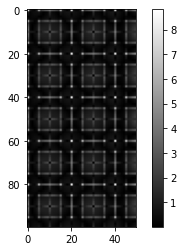

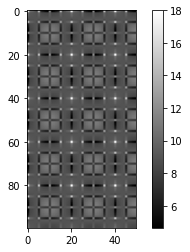

In [86]:
filteredImage = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(filteredFFT)))
plt.imshow(np.abs(filteredImage), cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(np.abs(image), cmap='gray')
plt.colorbar()
plt.show()

Ejercicio:
* Analizar qué ocurre si se cambia el filtro por su complemento (1 en lugar de cero).
* Consultar otros tipos de filtro e implementarlos (por ejemplo un pasobanda para eliminar solo una frecuencia en particular).
* Realizar el mismo tratamiento sobre una imagen de mapa de bits externa.
* Consultar otros ejemplos (por ejemplo:  http://www.cs.toronto.edu/~jepson/csc320/notes/linearFilters2.pdf ) y tratar de implementarlos.
